In [2]:
# A few common imports
import sklearn
import scipy
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import numpy as np
import os
import pandas as pd
import seaborn as sns

# To make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reading and processing the data


In [3]:
df = pd.read_csv('e-shop clothing 2008.csv', sep=';')

In [4]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [5]:
print('Available features in data set: {}'.format(list(df.columns)))

Available features in data set: ['year', 'month', 'day', 'order', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']


In [6]:
df = df.rename(columns={"session ID": "session_id",
                   "page 1 (main category)": "main_category",
                   "page 2 (clothing model)": "clothing_model",
                   "price 2": "premium",
                   "model photography": "photo"
                  })

df

,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [7]:
df['premium'] = df['premium'].replace({2 : 0})

In [8]:
df.head()

,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,0,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,0,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,0,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [9]:
df.shape

(165474, 14)

In [10]:
df.dtypes

year               int64
month              int64
day                int64
order              int64
country            int64
session_id         int64
main_category      int64
clothing_model    object
colour             int64
location           int64
photo              int64
price              int64
premium            int64
page               int64
dtype: object

In [11]:
summary = pd.DataFrame(df.dtypes, columns=['Feature type'])
summary['Is any null?'] = pd.DataFrame(df.isnull().any())
summary

,Feature type,Is any null?
year,int64,False
month,int64,False
day,int64,False
order,int64,False
country,int64,False
session_id,int64,False
main_category,int64,False
clothing_model,object,False
colour,int64,False
location,int64,False


In [12]:
df.describe()

,year,month,day,order,country,session_id,main_category,colour,location,photo,price,premium,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,0.511833,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,0.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,1.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,1.000000,5.000000


In [13]:
df['clothing_model']

0         A13
1         A16
2          B4
3         B17
4          B8
         ... 
165469    B10
165470    A11
165471     A2
165472     C2
165473     B2
Name: clothing_model, Length: 165474, dtype: object

In [14]:
dic = {"A":1, "B":2, "C":3, "P":4}
iter = 0
for row in df.values:
    desc = str(row[7])
    if dic[desc[0]] != row[6]:
        print(row, iter)

    iter += 1
    
df.at[19001, 'main_category'] = 1

[2008 4 10 27 29 2766 2 'A18' 4 6 1 38 0 1] 19001


In [15]:
df['clothing_model'] = df['clothing_model'].apply(lambda v: int(v[1:]))
df['clothing_model'] = 100 * df['main_category'] + df['clothing_model']

In [16]:
df.describe()

,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400836,261.600149,6.227655,3.258198,1.260071,43.802507,0.511833,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144425,121.865223,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,130.000000,3.000000,2.000000,1.000000,33.000000,0.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,228.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,356.000000,9.000000,5.000000,2.000000,52.000000,1.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,482.000000,14.000000,6.000000,2.000000,82.000000,1.000000,5.000000


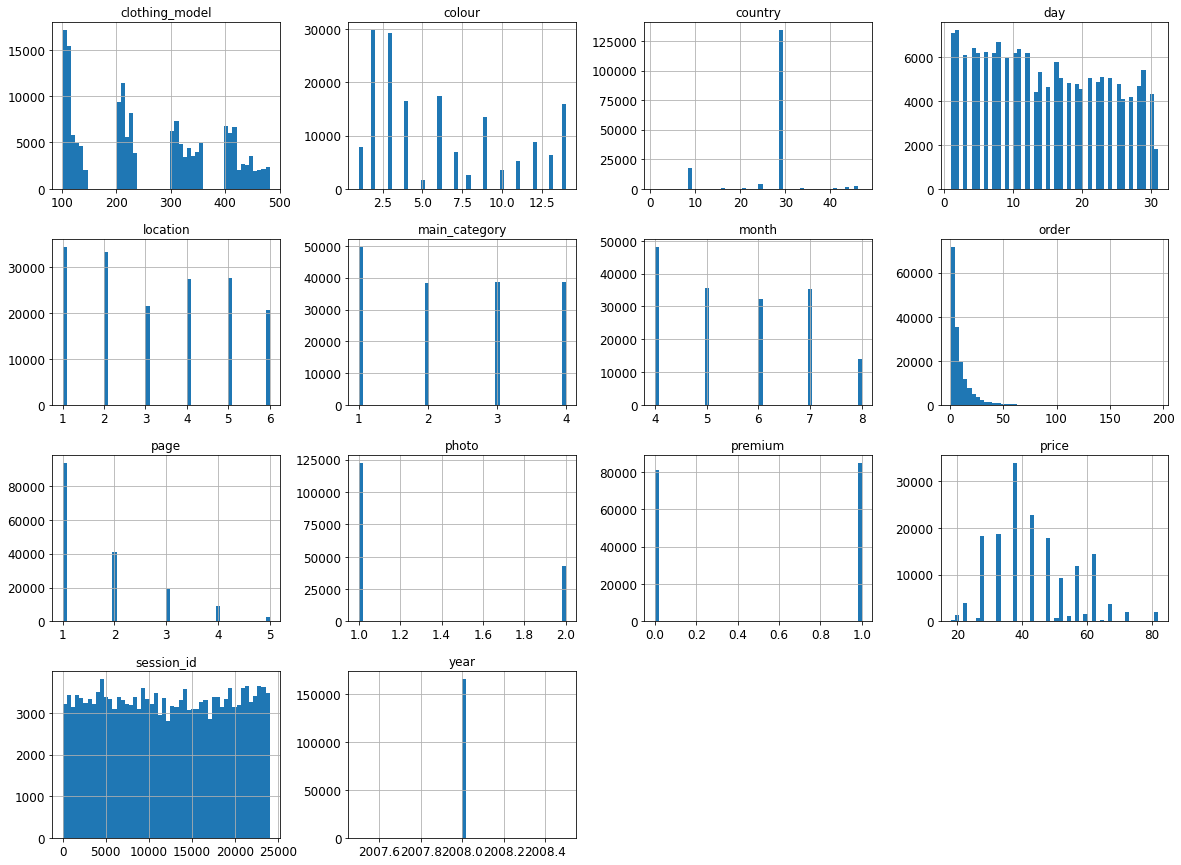

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
for feature in ['price']:
    alpha = 0.05
    p_value = scipy.stats.normaltest(df[feature])[1]
    if(p_value < alpha):
        print('For feature \'' + feature +'\' null hypothesis can be rejected. NOT a normal distribution.')
    else:
        print('For feature \'' + feature +'\' null hypothesis can not be rejected.')

For feature 'price' null hypothesis can be rejected. NOT a normal distribution.


In [19]:
df.groupby(['country']).count()

,year,month,day,order,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
country,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,3,3,3
2,58,58,58,58,58,58,58,58,58,58,58,58,58
3,256,256,256,256,256,256,256,256,256,256,256,256,256
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,4,4,4,4,4,4,4,4,4,4,4,4,4
6,5,5,5,5,5,5,5,5,5,5,5,5,5
7,9,9,9,9,9,9,9,9,9,9,9,9,9
8,1,1,1,1,1,1,1,1,1,1,1,1,1
9,18003,18003,18003,18003,18003,18003,18003,18003,18003,18003,18003,18003,18003


In [20]:
df['country'] = df['country'].apply(lambda v : 0 if v == 29 else 1)

In [21]:
df.describe()

,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,0.190429,12058.417056,2.400836,261.600149,6.227655,3.258198,1.260071,43.802507,0.511833,1.710166
std,0.0,1.328160,8.830374,13.478411,0.392640,7008.418903,1.144425,121.865223,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,0.000000,5931.000000,1.000000,130.000000,3.000000,2.000000,1.000000,33.000000,0.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,0.000000,11967.500000,2.000000,228.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,0.000000,18219.000000,3.000000,356.000000,9.000000,5.000000,2.000000,52.000000,1.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,1.000000,24026.000000,4.000000,482.000000,14.000000,6.000000,2.000000,82.000000,1.000000,5.000000


In [22]:
df.groupby(['country']).count()

,year,month,day,order,session_id,main_category,clothing_model,colour,location,photo,price,premium,page
country,,,,,,,,,,,,,
0,133963,133963,133963,133963,133963,133963,133963,133963,133963,133963,133963,133963,133963
1,31511,31511,31511,31511,31511,31511,31511,31511,31511,31511,31511,31511,31511


In [23]:
corr_matrix = df.corr(method='spearman')

In [24]:
corr_matrix["premium"].sort_values(ascending=False)

premium           1.000000
price             0.783931
main_category     0.143976
clothing_model    0.121155
colour            0.058974
month             0.013237
session_id        0.012684
order             0.004731
day              -0.004560
country          -0.012512
page             -0.041586
photo            -0.072944
location         -0.074084
year                   NaN
Name: premium, dtype: float64

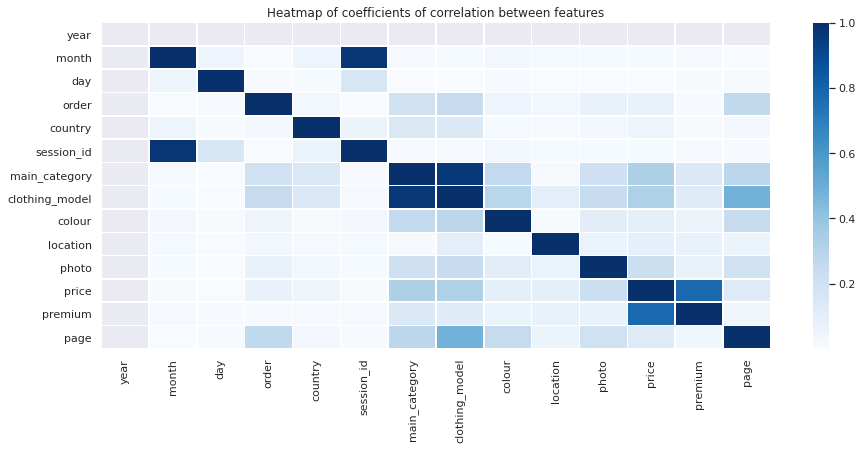

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(corr_matrix.abs(), cmap="Blues", linewidths=.5).set(title='Heatmap of coefficients of correlation between features')
plt.show()

In [26]:
ct_1 = pd.crosstab(df['premium'] > df['premium'].mean(), df['price'] > df['price'].mean())
ct_1.index = ["'premium' below mean", "premium' above mean"]
ct_1.columns = ["'price' below mean", "'price' above mean"]

ct_1

,'price' below mean,'price' above mean
'premium' below mean,79308,1471
premium' above mean,20886,63809


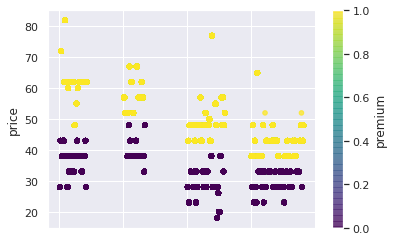

In [27]:
df.plot(kind="scatter", x="clothing_model", y="price",  c="premium", colormap='viridis', alpha=0.5)

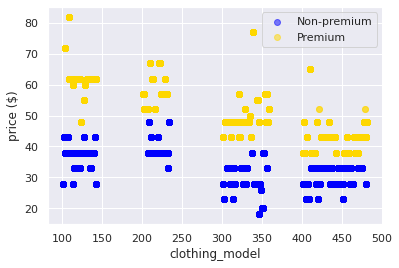

In [28]:
fig, ax = plt.subplots()
clr = ["blue", "gold"]
names = ["Non-premium", "Premium"]

for premium in [0, 1]:
    x = df['clothing_model'].loc[df['premium'] == premium]
    y = df['price'].loc[df['premium'] == premium]
    ax.scatter(x, y, c=clr[premium], label=names[premium],
               alpha=0.5)

ax.legend()
plt.xlabel('clothing_model')
plt.ylabel('price ($)')
ax.grid(True)

plt.show()

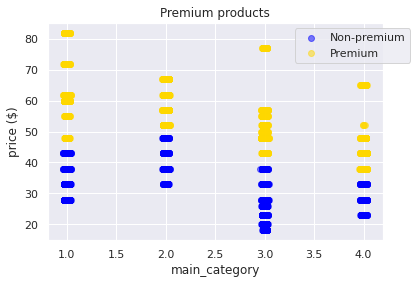

In [61]:
fig, ax = plt.subplots()
clr = ["blue", "gold"]
names = ["Non-premium", "Premium"]

for premium in [0, 1]:
    x = df['main_category'].loc[df['premium'] == premium]
    #adding small noise so that not all the items lie in the straight line
    x += np.random.normal(loc=0, scale=0.01, size=len(x))
    y = df['price'].loc[df['premium'] == premium]
    ax.scatter(x, y, c=clr[premium], label=names[premium],
               alpha=0.5)

plt.title('Premium products')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('main_category')
plt.ylabel('price ($)')
ax.grid(True)

plt.show()

In [33]:
product_info = df[['clothing_model', 'colour', 'location', 'photo', 'price', 'premium']]
gmin = product_info.groupby('clothing_model').min()
gmax = product_info.groupby('clothing_model').max()
equality = gmin == gmax 

print("Different models: ", len(gmin))
equality.sum()

Different models:  217


colour      217
location    217
photo       217
price       217
premium     217
dtype: int64

In [34]:
clickstream = df.drop(['clothing_model', 'price', 'year', 'month', 'day'], axis=1)
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   order          165474 non-null  int64
 1   country        165474 non-null  int64
 2   session_id     165474 non-null  int64
 3   main_category  165474 non-null  int64
 4   colour         165474 non-null  int64
 5   location       165474 non-null  int64
 6   photo          165474 non-null  int64
 7   premium        165474 non-null  int64
 8   page           165474 non-null  int64
dtypes: int64(9)
memory usage: 11.4 MB


In [35]:
from matplotlib import colors
import colorsys

dict_colors = dict(colors.cnames)
manually_found_hexes = {"burgundy": "#800020", 
                        "navy blue":"#000080",
                        "nothing": "#000000", #not important, never used
                        "multicolor": "#000000"
                       }
def hsv_from_name(cname):
    if cname in dict_colors:
        hexc = dict_colors[cname]
    elif cname in manually_found_hexes:
        hexc = manually_found_hexes[cname]
    else:
        print("FAIL")
        
    r,g,b = colors.hex2color(hexc)
    return colorsys.rgb_to_hsv(r, g, b)

#tests
orange_hsv = hsv_from_name('orange')

my_colors = ['nothing', 'beige', 'black', 'blue', 'brown', 'burgundy', 'gray', 'green', 'navy blue', 'multicolor', 'olive', 'pink', 'red', 'violet', 'white']

In [36]:
my_hsvs = [hsv_from_name(x) for x in my_colors]

In [37]:
clickstream['color_h'] = clickstream['colour'].apply(lambda clr : my_hsvs[clr][0])
clickstream['color_s'] = clickstream['colour'].apply(lambda clr : my_hsvs[clr][1])
clickstream['color_v'] = clickstream['colour'].apply(lambda clr : my_hsvs[clr][2])



In [38]:
clickstream = clickstream.drop(['colour'], axis=1)

In [39]:
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order          165474 non-null  int64  
 1   country        165474 non-null  int64  
 2   session_id     165474 non-null  int64  
 3   main_category  165474 non-null  int64  
 4   location       165474 non-null  int64  
 5   photo          165474 non-null  int64  
 6   premium        165474 non-null  int64  
 7   page           165474 non-null  int64  
 8   color_h        165474 non-null  float64
 9   color_s        165474 non-null  float64
 10  color_v        165474 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 13.9 MB


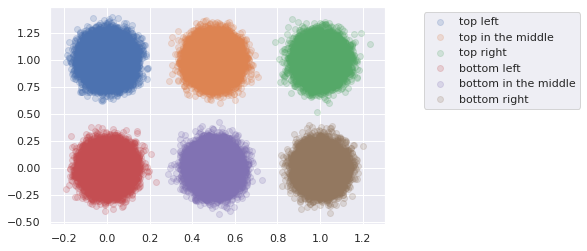

In [40]:
#[0-nothing, 1-top left, 2-top in the middle, top right, bottom left, bottom in the middle, bottom right]
positions = [(0.0, 0), (1.0, 0), (1.0, 0.5), (1.0, 1), (0.0, 0), (0.0, 0.5), (0.0, 1)]
text = ['nothing', 'top left', 'top in the middle', 'top right', 'bottom left', 'bottom in the middle', 'bottom right']
clickstream['loc_y'] = clickstream['location'].apply(lambda value: positions[value][0] + np.random.normal(0, 0.1))
clickstream['loc_x'] = clickstream['location'].apply(lambda value: positions[value][1] + np.random.normal(0, 0.05))

#let's plot positions on the screen in order to verify that they are correct
data_len = 34532
for lvl in np.arange(1, 7):
    i = (clickstream['location'] == lvl)
    plt.scatter(clickstream['loc_x'][i], 
                clickstream['loc_y'][i],
                label=text[lvl], alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

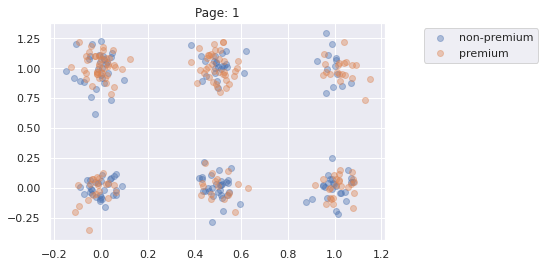

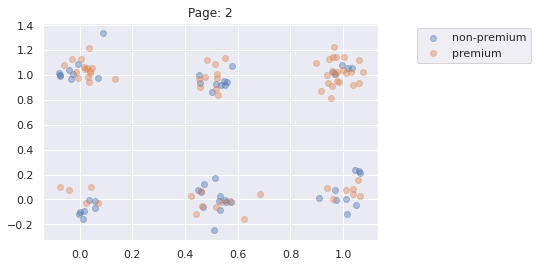

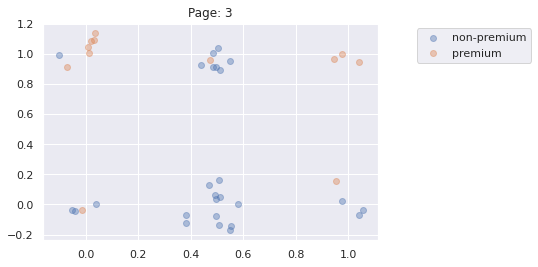

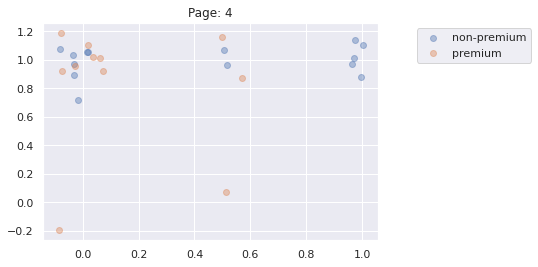

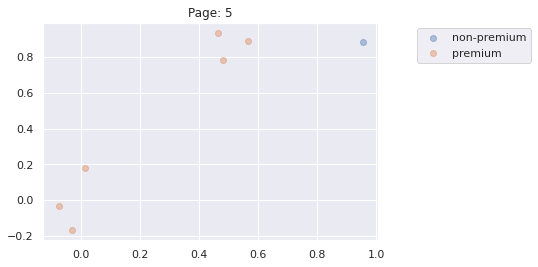

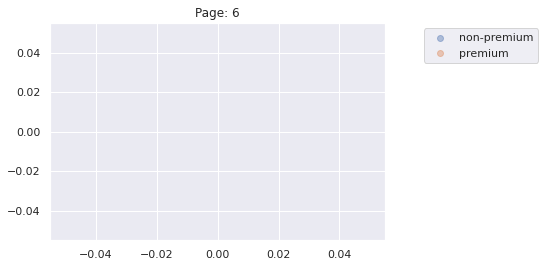

In [41]:
text = ['non-premium', 'premium']
rg = 500
for page in range(1, 7):
    plt.figure()
    plt.title('Page: {}'.format(page))
    for lvl in [0, 1]:
        i = (clickstream['premium'][0:rg] == lvl)
        i &= (clickstream['page'][0:rg] == page)
        plt.scatter(clickstream['loc_x'][0:rg][i], 
                    clickstream['loc_y'][0:rg][i],
                    label=text[lvl], alpha=0.4)

    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

In [42]:
clickstream = clickstream.drop(['location'], axis=1)

In [43]:
clickstream['photo'] = clickstream['photo'] - 1

In [44]:
onehot_features = ['trousers', 'skirts', 'blouses', 'sale']
index = 0
for feature in onehot_features:
    index += 1
    clickstream['is_' + feature] = (clickstream['main_category'] == index).astype('float')

In [45]:
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order          165474 non-null  int64  
 1   country        165474 non-null  int64  
 2   session_id     165474 non-null  int64  
 3   main_category  165474 non-null  int64  
 4   photo          165474 non-null  int64  
 5   premium        165474 non-null  int64  
 6   page           165474 non-null  int64  
 7   color_h        165474 non-null  float64
 8   color_s        165474 non-null  float64
 9   color_v        165474 non-null  float64
 10  loc_y          165474 non-null  float64
 11  loc_x          165474 non-null  float64
 12  is_trousers    165474 non-null  float64
 13  is_skirts      165474 non-null  float64
 14  is_blouses     165474 non-null  float64
 15  is_sale        165474 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 20.2 MB


In [46]:
clickstream = clickstream.drop(['main_category'], axis=1)

In [47]:
clickstream.describe()

,order,country,session_id,photo,premium,page,color_h,color_s,color_v,loc_y,loc_x,is_trousers,is_skirts,is_blouses,is_sale
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,9.817476,0.190429,12058.417056,0.260071,0.511833,1.710166,0.226316,0.423910,0.601646,0.541089,0.441017,0.300609,0.232103,0.233130,0.234158
std,13.478411,0.392640,7008.418903,0.438674,0.499861,0.982412,0.326902,0.453411,0.404960,0.508676,0.395995,0.458524,0.422176,0.422826,0.423472
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.431297,-0.194915,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5931.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010333,0.021477,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,11967.500000,0.000000,1.000000,1.000000,0.000000,0.102041,0.647059,0.857019,0.479002,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,18219.000000,1.000000,1.000000,2.000000,0.666667,1.000000,1.000000,1.009950,0.902432,1.000000,0.000000,0.000000,0.000000
max,195.000000,1.000000,24026.000000,1.000000,1.000000,5.000000,0.970899,1.000000,1.000000,1.401942,1.233947,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for feature in ['order', 'page', 'session_id']:
    clickstream[feature] = scaler.fit_transform(clickstream[feature].values.reshape(-1, 1))

In [49]:
clickstream.describe()

,order,country,session_id,photo,premium,page,color_h,color_s,color_v,loc_y,loc_x,is_trousers,is_skirts,is_blouses,is_sale
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,0.045451,0.190429,0.501870,0.260071,0.511833,0.177541,0.226316,0.423910,0.601646,0.541089,0.441017,0.300609,0.232103,0.233130,0.234158
std,0.069476,0.392640,0.291714,0.438674,0.499861,0.245603,0.326902,0.453411,0.404960,0.508676,0.395995,0.458524,0.422176,0.422826,0.423472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.431297,-0.194915,0.000000,0.000000,0.000000,0.000000
25%,0.005155,0.000000,0.246826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010333,0.021477,0.000000,0.000000,0.000000,0.000000
50%,0.025773,0.000000,0.498085,0.000000,1.000000,0.000000,0.000000,0.102041,0.647059,0.857019,0.479002,0.000000,0.000000,0.000000,0.000000
75%,0.056701,0.000000,0.758293,1.000000,1.000000,0.250000,0.666667,1.000000,1.000000,1.009950,0.902432,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970899,1.000000,1.000000,1.401942,1.233947,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

labels = clickstream['premium']
clickstream = clickstream.drop(['premium'], axis=1)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(clickstream, labels):
    X_train_pd = clickstream.loc[train_index]
    y_train_pd = labels.loc[train_index]
    X_test_pd = clickstream.loc[test_index]
    y_test_pd = labels.loc[test_index]

X_train = X_train_pd.values
y_train = y_train_pd.values
X_test = X_test_pd.values
y_test = y_test_pd.values

In [51]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, fpr, tpr, label=None):
    tt = 'ROC curve for: ' + str(type(model))
    plt.title(tt)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1.01])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")

In [52]:
from sklearn.metrics import precision_recall_curve
def plot_pr_vs_threshold(model, precisions, recalls, thresholds):
    tt = 'Precision/threshold curve for: ' + str(type(model))
    plt.title(tt)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    
def fit_model_analyse(model, X, y, fit_model=True):
    if fit_model:
        model.fit(X, y)
        
    y_scores = model.predict(X)
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    plt.title('')
    plot_pr_vs_threshold(model, precisions, recalls, thresholds)
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plot_roc_curve(model, fpr, tpr)
    plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
def run_cross_validation(model, X, y, cv_param):
    scores_f1 = cross_val_score(model, X, y,
                             scoring = "f1", cv=cv_param, n_jobs=-1)
    
    scores_acc = cross_val_score(model, X, y,
                             scoring = "accuracy", cv=cv_param, n_jobs=-1)
    
    print("Running cross-validation for: ", type(model))
    print("Av Accuracy: ", np.mean(scores_acc))
    print(scores_acc)
    print("Av F1: ", np.mean(scores_f1))
    print(scores_f1)

Running cross-validation for:  <class 'sklearn.dummy.DummyClassifier'>
Av Accuracy:  0.500049096079461
[0.50045324 0.50215289 0.49822481 0.50007554 0.499339  ]
Av F1:  0.5104505808950215
[0.51535509 0.5048831  0.5109807  0.50853217 0.51250185]


/home/senterse/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


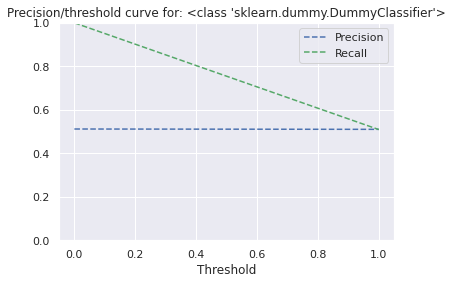

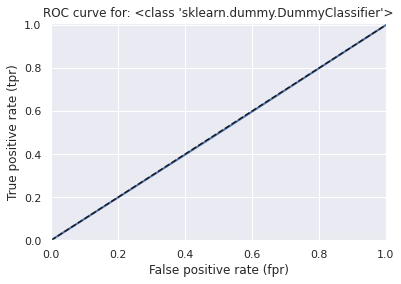

In [54]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
run_cross_validation(dummy_clf, X_train, y_train, 5)
fit_model_analyse(dummy_clf, X_train, y_train)

Running cross-validation for:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Av Accuracy:  0.6079212074548318
[0.60775797 0.6069648  0.60609609 0.60934431 0.60944287]
Av F1:  0.637338665500496
[0.63781258 0.63696623 0.63421136 0.63738036 0.64032281]


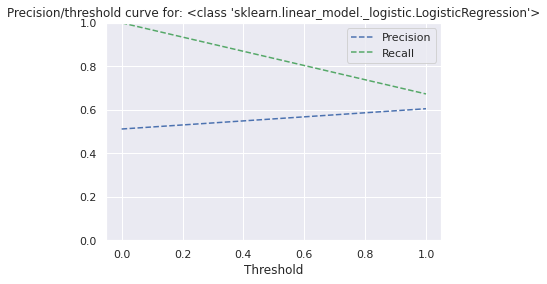

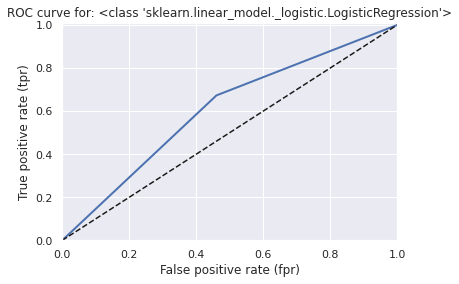

In [241]:
from sklearn.linear_model import LogisticRegression
simple_log_reg = LogisticRegression()

run_cross_validation(simple_log_reg, X_train, y_train, 5)
fit_model_analyse(simple_log_reg, X_train, y_train)

In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
lin_reg_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LogisticRegression())])

lin_reg_poly.fit(X_train, y_train)
y_scores = lin_reg_poly.predict(X_train)
y_scores, len(y_scores), sum(y_scores)

/home/senterse/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 1, 1, ..., 1, 1, 1]), 132379, 68889)

Running cross-validation for:  <class 'sklearn.pipeline.Pipeline'>
Av Accuracy:  0.8727366218034014
[0.87381024 0.87290376 0.87177066 0.87120411 0.87399433]
Av F1:  0.876808761216855
[0.87754279 0.87705068 0.87581843 0.87600902 0.87762289]


/home/senterse/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


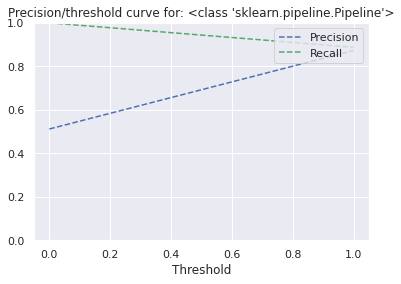

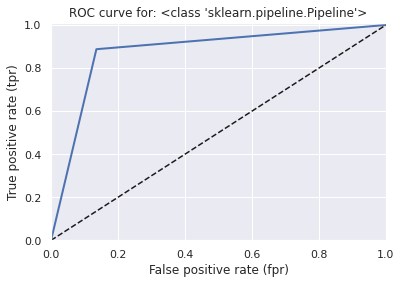

In [353]:
run_cross_validation(lin_reg_poly, X_train, y_train, 5)
fit_model_analyse(lin_reg_poly, X_train, y_train)

Running cross-validation for:  <class 'sklearn.naive_bayes.GaussianNB'>
Av Accuracy:  0.60264846228437
[0.59861762 0.60061943 0.60428312 0.60628494 0.6034372 ]
Av F1:  0.6474534086583874
[0.64695525 0.64663815 0.64603534 0.64731357 0.65032473]


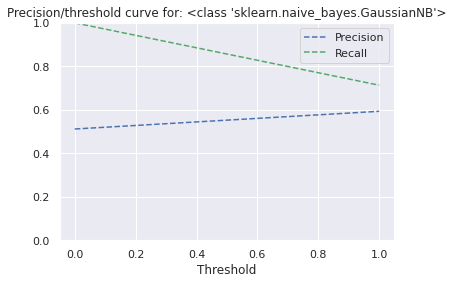

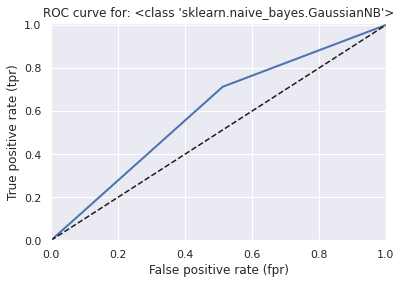

In [244]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
run_cross_validation(gnb, X_train, y_train, 5)
fit_model_analyse(gnb, X_train, y_train)

In [245]:
from sklearn.linear_model import SGDClassifier

simple_sgd = SGDClassifier(max_iter=700, random_state=42, loss="perceptron", eta0=1, n_jobs=-1, penalty=None)
simple_sgd.fit(X_train, y_train)
y_scores = simple_sgd.predict(X_train)
y_scores, len(y_scores), sum(y_scores), sum(y_train)

(array([0, 1, 1, ..., 1, 1, 1]), 132379, 89721, 67756)

Running cross-validation for:  <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Av Accuracy:  0.5256875510311962
[0.53336959 0.51647555 0.52721751]
Av F1:  0.49750452470979534
[0.59005754 0.65111031 0.25134573]


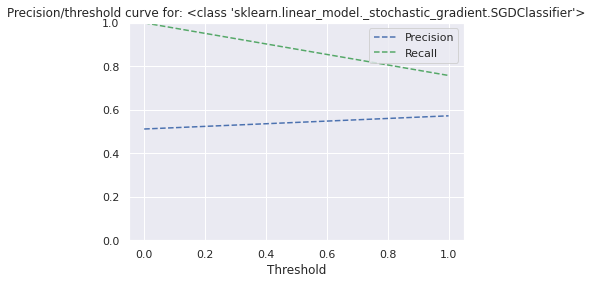

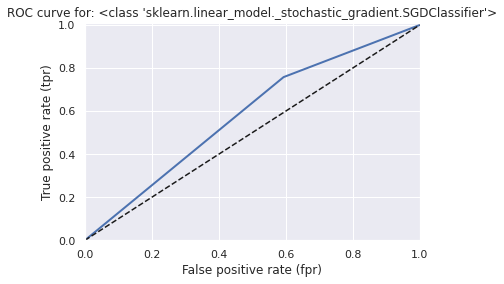

In [246]:
run_cross_validation(simple_sgd, X_train, y_train, 3)
fit_model_analyse(simple_sgd, X_train, y_train)

In [356]:
from sklearn.kernel_approximation import RBFSampler
sgd_kernel = Pipeline([('rbf', RBFSampler(gamma=1, random_state=42)),
                  ('sgd', SGDClassifier(max_iter=700, random_state=42, loss="perceptron", eta0=1, n_jobs=-1, penalty=None) )])

sgd_kernel.fit(X_train, y_train)
y_scores = sgd_kernel.predict(X_train)
y_scores, len(y_scores), sum(y_scores), sum(y_train)

(array([0, 0, 0, ..., 0, 0, 1]), 132379, 24262, 67756)

Running cross-validation for:  <class 'sklearn.pipeline.Pipeline'>
Av Accuracy:  0.6779399251165227
[0.66859292 0.65204188 0.71318497]
Av F1:  0.6869646483952118
[0.61164223 0.71182432 0.73742739]


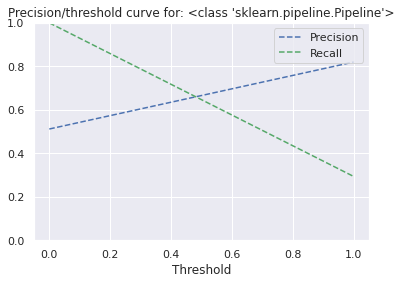

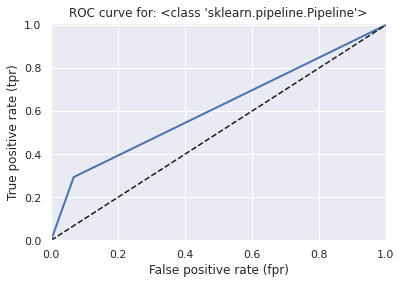

In [357]:
run_cross_validation(sgd_kernel, X_train, y_train, 3)
fit_model_analyse(sgd_kernel, X_train, y_train)

In [55]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=42, max_depth=15, min_impurity_decrease=0.0001)

dec_tree.fit(X_train, y_train)
y_scores = dec_tree.predict(X_train)
y_scores, len(y_scores), sum(y_scores), sum(y_train)

(array([0, 1, 1, ..., 1, 1, 1]), 132379, 65723, 67756)

In [56]:
run_cross_validation(dec_tree, X_train, y_train, 5)

Running cross-validation for:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Av Accuracy:  0.9223215320989837
[0.92321348 0.92177821 0.92136274 0.92083396 0.92441926]
Av F1:  0.9231036192001019
[0.92390043 0.92244898 0.92187617 0.9217151  0.92557742]


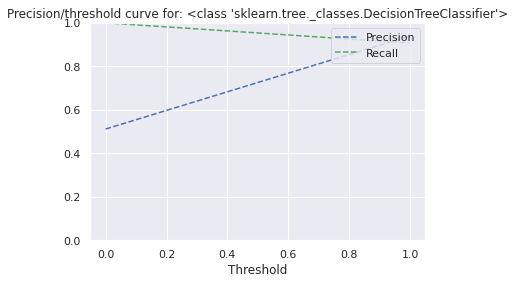

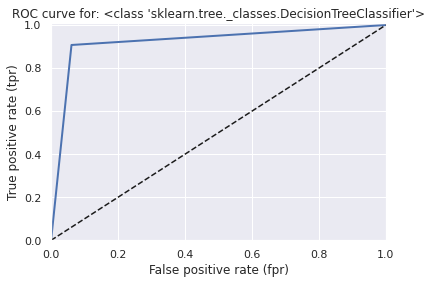

In [57]:
dec_tree.fit(X_train, y_train)
fit_model_analyse(dec_tree, X_test, y_test, fit_model=False)

In [58]:
feature_importances = dec_tree.feature_importances_
feature_importances
attributes = list(X_train_pd.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.29012896919577197, 'page'),
 (0.16916597649856724, 'loc_x'),
 (0.11840077350880564, 'loc_y'),
 (0.08848704647222472, 'color_s'),
 (0.08624270753543922, 'photo'),
 (0.08061718919671758, 'color_v'),
 (0.0615248220326949, 'is_trousers'),
 (0.038853093829611655, 'is_sale'),
 (0.02463887524178521, 'is_blouses'),
 (0.023336043417307228, 'color_h'),
 (0.014243829620385087, 'is_skirts'),
 (0.0038974117821650453, 'order'),
 (0.00046326166852448086, 'session_id'),
 (0.0, 'country')]

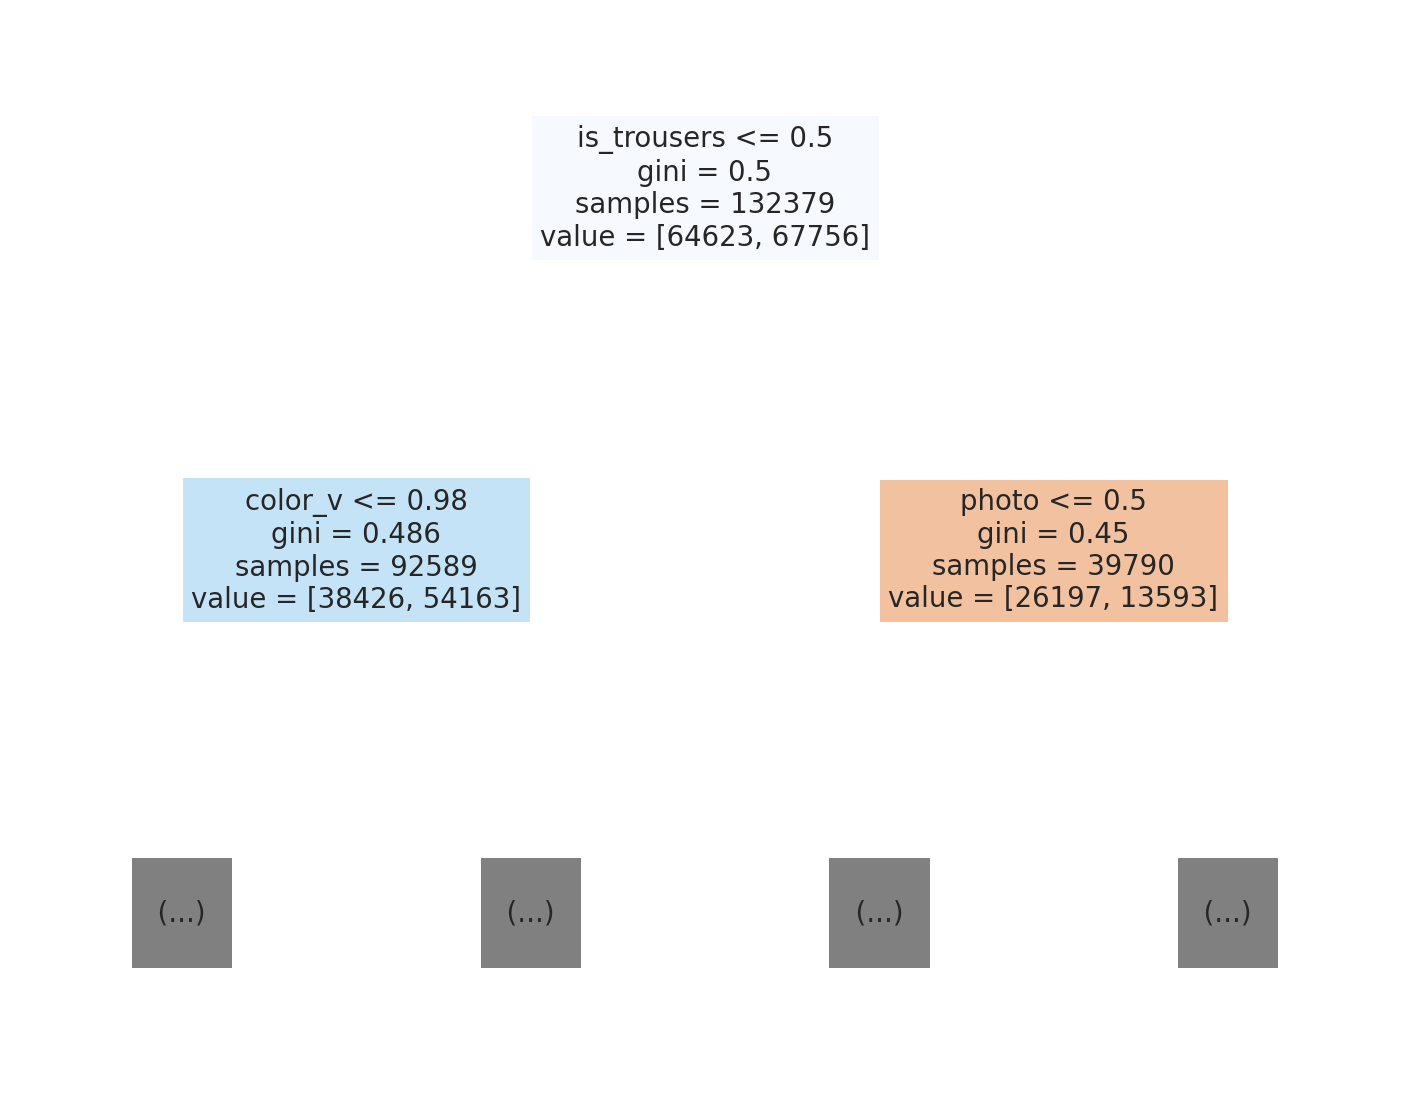

In [59]:
fig = plt.figure(figsize=(25,20))
dec_tree.fit(X_train, y_train)
_ = sklearn.tree.plot_tree(dec_tree, feature_names = attributes, max_depth = 1, filled=True)
fig.savefig("decistion_tree.png")

In [254]:
parameters = {'criterion':('entropy', 'gini'),
              'splitter':('best','random'),
              'max_depth':np.arange(10, 20),
              'min_impurity_decrease': [0.1, 0.01, 0.001, 0.0001],
              'min_samples_leaf':np.arange(1,5)}

In [255]:
from sklearn.model_selection import GridSearchCV
rnd_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

In [256]:
rnd_search.fit(X_train, y_train)
best_parameters_tree = rnd_search.best_params_

In [257]:
best_parameters_tree

{'criterion': 'entropy',
 'max_depth': 16,
 'min_impurity_decrease': 0.0001,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [258]:
improved_tree = DecisionTreeClassifier(**best_parameters_tree)
run_cross_validation(improved_tree, X_train, y_train, 5)

Running cross-validation for:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Av Accuracy:  0.9231826908001274
[0.92415773 0.92298686 0.92200483 0.92215591 0.92460812]
Av F1:  0.9241484452951916
[0.92493458 0.92400015 0.9226099  0.92343698 0.92576062]


In [259]:

from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()

In [260]:
run_cross_validation(forest_reg, X_train, y_train, 3)

Running cross-validation for:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Av Accuracy:  0.9159685328669056
[0.91755614 0.91363369 0.91671577]
Av F1:  0.9184390277549026
[0.91970288 0.91623555 0.91937865]


In [261]:

param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [262]:
cv_results = grid_search.cv_results_
#for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
#    print(np.sqrt(-mean_score), params)

cv_results

{'mean_fit_time': array([ 0.75537534,  2.58766623,  7.43410635,  1.05365252,  3.62553072,
         9.69197812,  1.46298475,  4.06881671, 12.33225384,  1.6680512 ,
         4.90236859, 12.30996566]),
 'std_fit_time': array([0.09642519, 0.11991785, 0.35918545, 0.02556303, 0.39899528,
        0.42928928, 0.25034562, 0.20854528, 0.43374135, 0.0793134 ,
        0.13624236, 0.92215343]),
 'mean_score_time': array([0.04652009, 0.10748172, 0.2900496 , 0.03983822, 0.08742728,
        0.26817055, 0.04106097, 0.0991118 , 0.21787171, 0.03997288,
        0.07970166, 0.17728558]),
 'std_score_time': array([0.0066087 , 0.00949643, 0.03500599, 0.00190813, 0.00519747,
        0.0783401 , 0.00331694, 0.03348739, 0.02262591, 0.00198608,
        0.01002703, 0.03486593]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
          

In [263]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
attributes = list(X_train_pd.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.22629553967599628, 'loc_x'),
 (0.13172529650104467, 'page'),
 (0.128376814012721, 'color_v'),
 (0.1255383373683227, 'loc_y'),
 (0.07018677566078682, 'session_id'),
 (0.06165338273719615, 'color_s'),
 (0.05788565479085729, 'color_h'),
 (0.053555340238388024, 'photo'),
 (0.03636899395829389, 'is_trousers'),
 (0.035157450496863155, 'order'),
 (0.026049696526469986, 'is_skirts'),
 (0.02468368959229394, 'is_sale'),
 (0.019929315430360594, 'is_blouses'),
 (0.002593713010405633, 'country')]

In [264]:
tuned_forest = RandomForestClassifier(max_features=4, n_estimators=30, n_jobs=-1)
run_cross_validation(tuned_forest, X_train, y_train, 3)

Running cross-validation for:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Av Accuracy:  0.9150242742222393
[0.91662701 0.9132031  0.91524271]
Av F1:  0.9168598486898526
[0.91852278 0.91574201 0.91631475]


In [265]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 15, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 200, 400]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 15, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 200, 400]}

In [266]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/senterse/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [267]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [268]:
rf_tuned = RandomForestClassifier(**rf_random.best_params_)
run_cross_validation(rf_tuned, X_train, y_train, cv_param=3)

Running cross-validation for:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Av Accuracy:  0.9197304590237648
[0.92129535 0.91757694 0.92031909]
Av F1:  0.9222814416871775
[0.92375676 0.92033805 0.92274951]


In [269]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

run_cross_validation(xgb_model, X_train, y_train, cv_param=3)

Running cross-validation for:  <class 'xgboost.sklearn.XGBClassifier'>
Av Accuracy:  0.9193678705956597
[0.92002629 0.91807551 0.92000181]
Av F1:  0.9215069388224286
[0.92205067 0.92029545 0.9221747 ]


In [270]:
from sklearn.model_selection import train_test_split, KFold
X_boost_train, X_boost_valid, y_boost_train, y_boost_valid = train_test_split(X_train, y_train, random_state=42)


In [271]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_boost_train, y_boost_train, early_stopping_rounds=5, eval_set=[(X_boost_valid, y_boost_valid)])

[0]	validation_0-error:0.22318
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.17658
[2]	validation_0-error:0.18287
[3]	validation_0-error:0.14483
[4]	validation_0-error:0.14087
[5]	validation_0-error:0.14183
[6]	validation_0-error:0.13495
[7]	validation_0-error:0.10331
[8]	validation_0-error:0.10633
[9]	validation_0-error:0.10461
[10]	validation_0-error:0.10274
[11]	validation_0-error:0.09932
[12]	validation_0-error:0.09926
[13]	validation_0-error:0.08747
[14]	validation_0-error:0.09007
[15]	validation_0-error:0.08959
[16]	validation_0-error:0.08606
[17]	validation_0-error:0.08645
[18]	validation_0-error:0.08615
[19]	validation_0-error:0.08539
[20]	validation_0-error:0.08222
[21]	validation_0-error:0.08146
[22]	validation_0-error:0.08031
[23]	validation_0-error:0.08125
[24]	validation_0-error:0.08028
[25]	validation_0-error:0.08044
[26]	validation_0-error:0.08068
[27]	validation_0-error:0.08038
[28]	validation_0-error:0.07962
[29]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
kfold = KFold(n_splits=5)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)

In [273]:
scores = cross_val_score(xgb_model, X_train, y_train, scoring="accuracy", cv=5)
scores

array([0.92189152, 0.92083396, 0.92162713, 0.91890769, 0.9215864 ])

In [274]:
from scipy.stats import uniform, randint
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [275]:
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=50, cv=3, verbose=1, n_jobs=-1, return_train_score=True)

In [276]:
search.fit(X_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ef4cbe070>,
       

In [277]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [278]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.920 (std: 0.001)
Parameters: {'colsample_bytree': 0.9406590942262119, 'gamma': 0.03727532183988541, 'learning_rate': 0.3260660809801552, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.679486272613669}



In [279]:
xgb_best = xgb.XGBClassifier(**search.best_params_)

In [280]:
run_cross_validation(xgb_best, X_train, y_train, cv_param=5)

Running cross-validation for:  <class 'xgboost.sklearn.XGBClassifier'>
Av Accuracy:  0.9206218610372948
[0.92264693 0.9212872  0.91970086 0.9175102  0.92196412]
Av F1:  0.9226717646130365
[0.92465048 0.92309396 0.92149188 0.92000586 0.92411665]


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1024, 128, 16, 8),
              random_state=42)

KeyboardInterrupt: 

In [285]:
NUM = 1000
X = X_train_pd.values[0:NUM]

# rescale the features, so they have the same variance
for k in range(14):
    X[:,k] = X[:,k] / np.std(X[:,k])

pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

# how the results are returned
print("μ:", pca.mean_)
k,i = 2,10
print(f"δ[k={k}]:", pca.components_[k])
print(f"λ[k={k},i={i}]:", pca_result[i,k])

μ: [0.71153489 0.49060655 1.72624905 0.58658846 0.72949501 0.67552484
 0.93013761 1.46389683 1.03620144 1.16075758 0.62670381 0.5881284
 0.54807857 0.54653573]
δ[k=2]: [-0.01451063  0.34846887 -0.14651156  0.02312159  0.05648877 -0.01891182
 -0.2182245   0.07309594 -0.05255329  0.1101815   0.18243478 -0.39955288
  0.64237024 -0.42353131]
λ[k=2,i=10]: -1.2986181185349102


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.550277
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.016663
[t-SNE] KL divergence after 1000 iterations: 0.469273


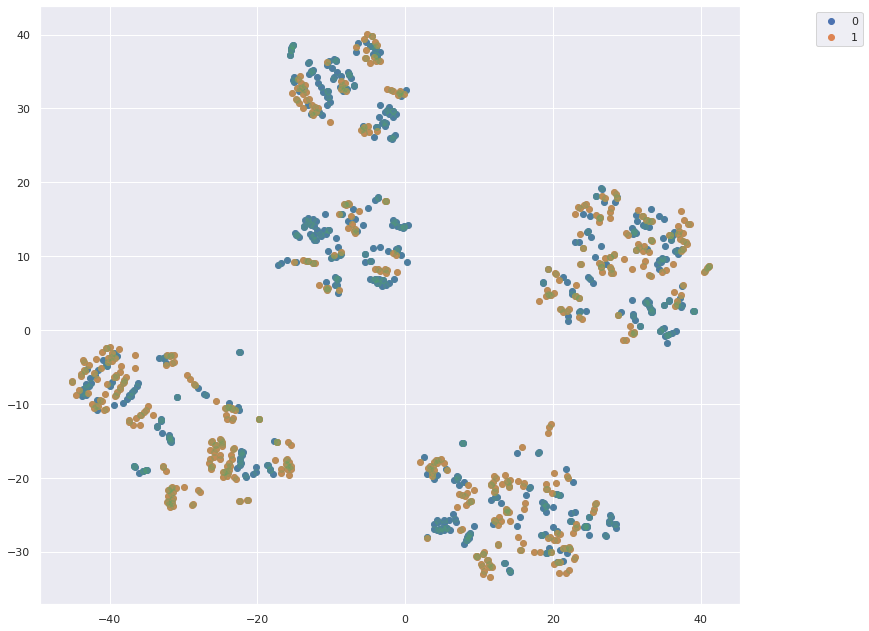

In [294]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=40)

goal = 1000
X_ = X[0:goal]

tsne_results = tsne.fit_transform(X_)
p1,p2 = tsne_results[:,0], tsne_results[:,1]
fig,ax = plt.subplots(figsize=(14,11))

for lvl in [0, 1]:
    i = y_train_pd[0:NUM] == lvl
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
plt.show()

#It looks like the TSNE method produced a better clustering

In [349]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def plot_conf_mx(conf_mx):
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.imshow(norm_conf_mx, cmap = "jet")
    plt.show()
    
def final_evaluate(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cmx = confusion_matrix(y, y_pred)
    row_sums = cmx.sum(axis=1, keepdims=True)
    norm_conf_mx = cmx / row_sums
    print("Confusion matrix: ")
    print(norm_conf_mx)



    
    print("Accuracy: {}, F1: {}".format(acc, f1))

Confusion matrix: 
[[0.93339936 0.06660064]
 [0.08560128 0.91439872]]
Accuracy: 0.9236742710379211, F1: 0.9246060171919771


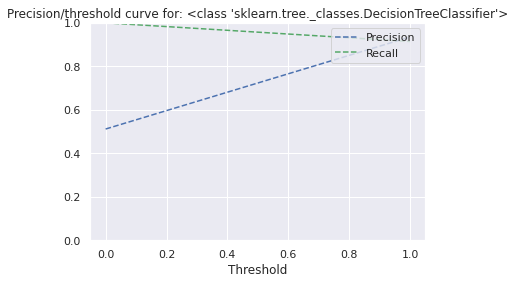

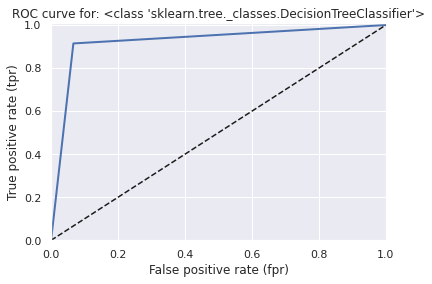

In [350]:
improved_tree.fit(X_train, y_train)
final_evaluate(improved_tree, X_test, y_test)
fit_model_analyse(improved_tree, X_test, y_test, fit_model=False)

Confusion matrix: 
[[0.91891557 0.08108443]
 [0.07686404 0.92313596]]
Accuracy: 0.9210756911920229, F1: 0.9229180192409845


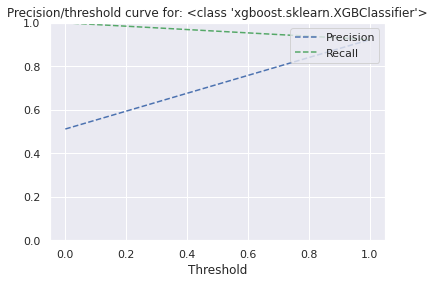

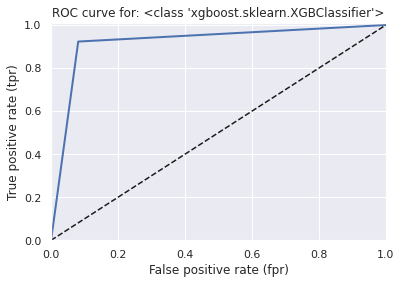

In [351]:
xgb_best = xgb.XGBClassifier(**search.best_params_)
xgb_best.fit(X_train, y_train)
final_evaluate(xgb_best, X_test, y_test)
fit_model_analyse(xgb_best, X_test, y_test, fit_model=False)